In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import ta
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, InputLayer, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [47]:
df = pd.read_csv("/kaggle/input/stock-dataset/JPM.csv")
df = df["Close"]
df

0          5.037037
1          5.074074
2          5.148148
3          5.111111
4          5.222222
            ...    
11151    199.610001
11152    194.360001
11153    191.529999
11154    193.660004
11155    193.779999
Name: Close, Length: 11156, dtype: float64

In [48]:
data = np.array(df)
data.shape

(11156,)

In [49]:
normalizer = MinMaxScaler(feature_range=(0,1))
data_scaled = normalizer.fit_transform(data.reshape(-1,1))
data_scaled.shape

(11156, 1)

In [50]:
train_ratio = 0.9
val_ratio=0.08

train_data = data_scaled[:int(len(data_scaled)*train_ratio)]
val_data = data_scaled[int(len(data_scaled)*train_ratio):int(len(data_scaled)*(train_ratio+val_ratio))]
test_data = data_scaled[int(len(data_scaled)*(train_ratio+val_ratio)):]

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(10040, 1)
(892, 1)
(224, 1)


In [6]:
def createXy(data, period=100):
    params = []
    target = []
    for i in range(period, len(data)):
        params.append(data[i-period:i])
        target.append(data[i])
    return np.array(params), np.array(target)

X_train, y_train = createXy(train_data, 100)
X_val, y_val = createXy(val_data, 100)
X_test, y_test = createXy(test_data, 100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(9940, 100, 1) (9940, 1)
(792, 100, 1) (792, 1)
(124, 100, 1) (124, 1)


In [7]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss=MeanSquaredError(),optimizer=Adam())

In [9]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1, epochs=100)

Epoch 1/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 2/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.2657e-04 - val_loss: 0.0011
Epoch 3/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.0175e-04 - val_loss: 7.8594e-04
Epoch 4/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 9.0084e-05 - val_loss: 0.0011
Epoch 5/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 8.0065e-05 - val_loss: 5.2354e-04
Epoch 6/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 6.5798e-05 - val_loss: 0.0011
Epoch 7/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 9.2779e-05 - val_loss: 6.4793e-04
Epoch 8/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.8136e-05 - val_loss: 2.8829e-04
Epoch 9/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.6872e-05 - val_loss: 2.6477e-04
Epoch 10/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.0495e-05 - val_loss: 2.1548e-04
Epoch 11/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - lo

In [10]:
pred_data = model.predict(X_test)
pred_data.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


(124, 1)

In [17]:
original_pred = normalizer.inverse_transform(y_test)
pred_pred = normalizer.inverse_transform(pred_data)

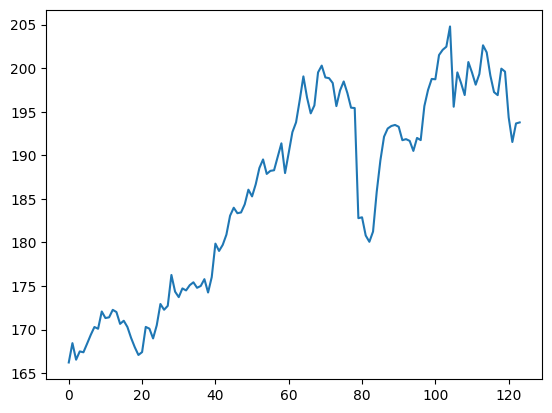

In [18]:
plt.plot(original_pred)

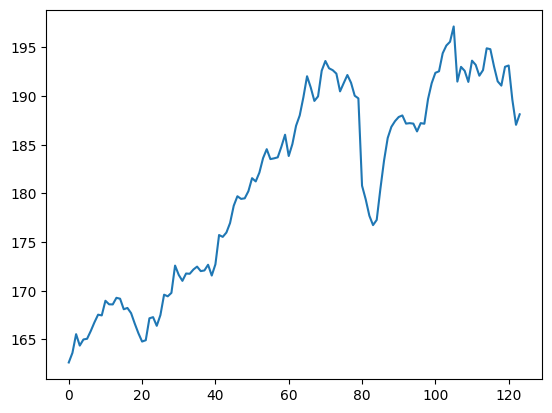

In [19]:
plt.plot(pred_pred)

In [61]:
final_input = np.expand_dims(X_test[0], axis=0)
final_input.shape

(1, 100, 1)

In [62]:
def predict_future(final_input, period):
    pred_ops = []
    for i in range(period):
        pred_data = model.predict(final_input)
        pred_ops.append(pred_data[0, 0])
        final_input = np.expand_dims(final_input[0, 1:], axis=0)
        pred_data = np.expand_dims(pred_data, axis=0)
        final_input = np.concatenate([final_input, pred_data], axis=1)
    return np.expand_dims(pred_ops, axis=1)

pred_ops = predict_future(final_input, 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [63]:
pred_ops.shape

(10, 1)

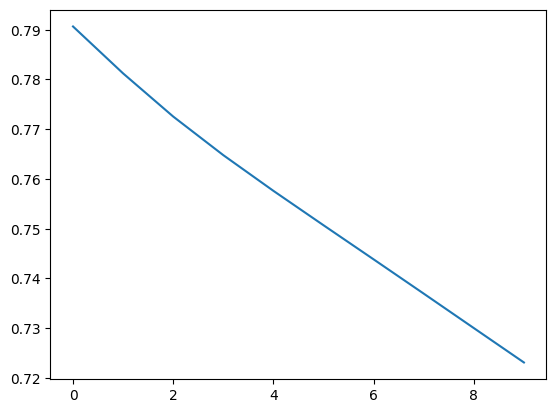

In [64]:
plt.plot(pred_ops)

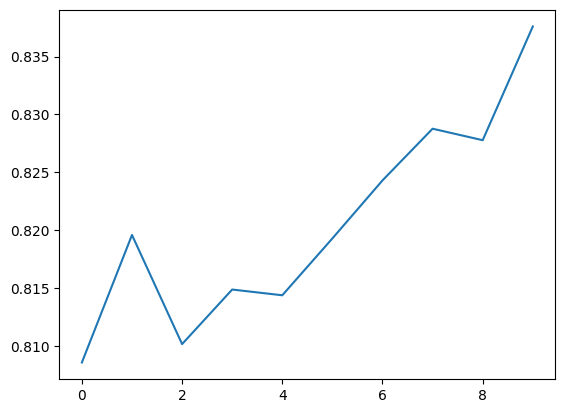

In [65]:
plt.plot(test_data[100:110])

# predicting 10 days data at once

In [51]:
def createXy(data, period=100, frame=10):
    params = []
    target = []
    for i in range(period, len(data)-frame+1):
        params.append(data[i-period:i])
        target.append(data[i:i+frame])
    return np.array(params), np.array(target)

X_train, y_train = createXy(train_data, 150)
X_val, y_val = createXy(val_data, 150)
X_test, y_test = createXy(test_data, 150)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(9881, 150, 1) (9881, 10, 1)
(733, 150, 1) (733, 10, 1)
(65, 150, 1) (65, 10, 1)


In [52]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=10,activation='linear'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 150, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 150, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,310 (200.43 KB)

 Trainable params: 51,310 (200.43 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss=MeanSquaredError(), optimizer=Adam())

In [54]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1, epochs=100)

Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 2.0986e-04 - val_loss: 0.0014
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.8666e-04 - val_loss: 0.0014
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.7032e-04 - val_loss: 0.0012
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 1.5060e-04 - val_loss: 0.0020
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.6218e-04 - val_loss: 0.0016
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.4769e-04 - val_loss: 0.0011
Epoch 8/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.3398e-04 - val_loss: 0.0011
Epoch 9/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.2781e-04 - val_loss: 0.0010
Epoch 10/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.1778e-04 - val_loss: 0.0011
Epoch 11/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.1555e-04 - val_l

In [103]:
final_input = np.expand_dims(X_test[10], axis=0)
final_input.shape

(1, 150, 1)

In [104]:
pred_op = model.predict(final_input)
pred_op.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


(1, 10)

In [105]:
pred_op = normalizer.inverse_transform(np.expand_dims(pred_op[0], axis=1))
pred_op

array([[183.69281],
       [182.32928],
       [183.15944],
       [181.71196],
       [180.77365],
       [180.43816],
       [184.67682],
       [184.79684],
       [182.28043],
       [183.54556]], dtype=float32)

In [106]:
act_op = normalizer.inverse_transform(y_test[3])
act_op

array([[189.529999],
       [187.869995],
       [188.220001],
       [188.289993],
       [189.839996],
       [191.380005],
       [187.970001],
       [190.300003],
       [192.660004],
       [193.789993]])

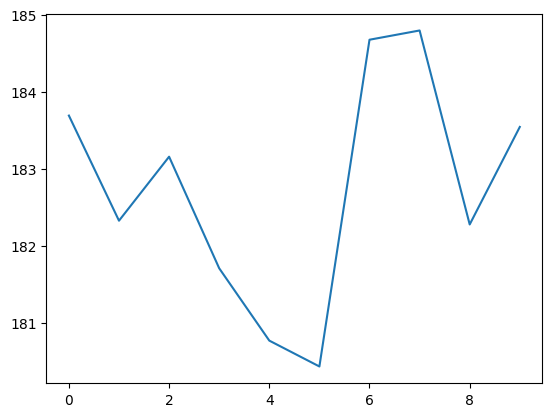

In [107]:
plt.plot(pred_op[:, 0])

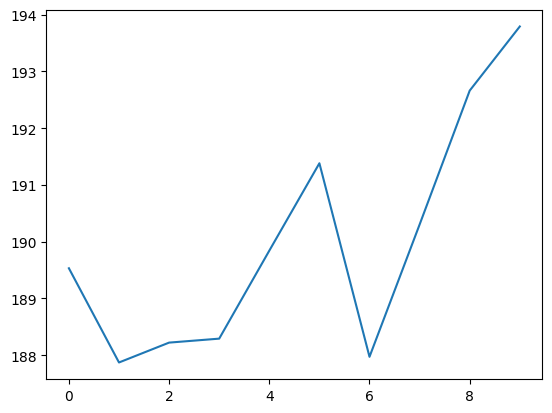

In [97]:
plt.plot(act_op)

# 30 days prediction

In [14]:
def createXy(data, period=100, frame=10):
    params = []
    target = []
    for i in range(period, len(data)-frame+1):
        params.append(data[i-period:i])
        target.append(data[i:i+frame])
    return np.array(params), np.array(target)

X_train, y_train = createXy(train_data, 150, 30)
X_val, y_val = createXy(val_data, 150, 30)
X_test, y_test = createXy(test_data, 150, 30)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(9861, 150, 1) (9861, 30, 1)
(713, 150, 1) (713, 30, 1)
(45, 150, 1) (45, 30, 1)


In [15]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=100,return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(units=30,activation='linear'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 150, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 150, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,630 (799.34 KB)

 Trainable params: 204,630 (799.34 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss=MeanSquaredError(), optimizer=Adam())
model.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1, epochs=100)

Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 3.3840e-04 - val_loss: 0.0026
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.9856e-04 - val_loss: 0.0021
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 3.0690e-04 - val_loss: 0.0021
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.7360e-04 - val_loss: 0.0028
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.6106e-04 - val_loss: 0.0019
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.5027e-04 - val_loss: 0.0022
Epoch 8/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.4094e-04 - val_loss: 0.0018
Epoch 9/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 2.4726e-04 - val_loss: 0.0019
Epoch 10/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.8501e-04 - val_loss: 0.0018
Epoch 11/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.2590e-04 - val_lo

In [108]:
final_input = np.expand_dims(X_test[50], axis=0)
final_input.shape

(1, 150, 1)

In [109]:
pred_op = model.predict(final_input)
pred_op.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


(1, 10)

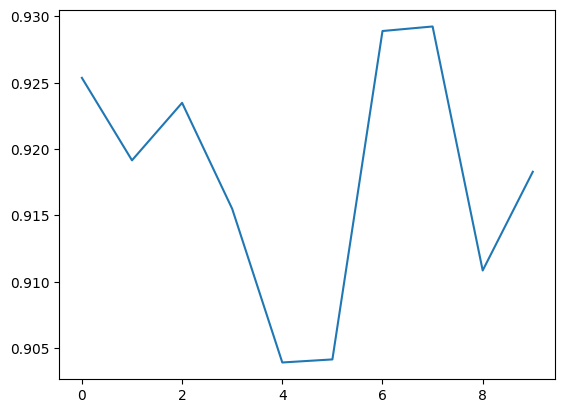

In [110]:
plt.plot(pred_op[0])

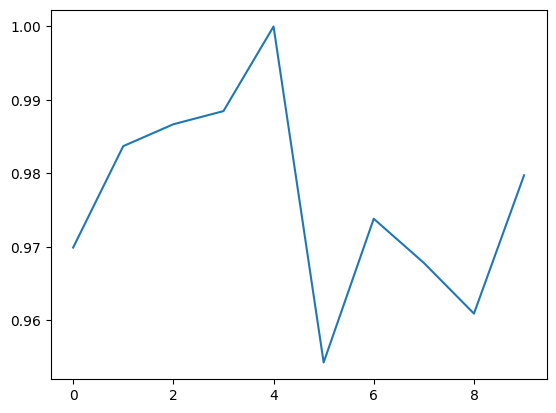

In [111]:
plt.plot(y_test[50])